In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

In [ ]:
df_country = pd.read_csv('/content/drive/MyDrive/covid 19 dataset/country_wise_latest.csv')
df_covid = pd.read_csv('/content/drive/MyDrive/covid 19 dataset/covid_19_clean_complete.csv')
df_day = pd.read_csv('/content/drive/MyDrive/covid 19 dataset/day_wise.csv')
df_fgroup = pd.read_csv('/content/drive/MyDrive/covid 19 dataset/full_grouped.csv')
df_world = pd.read_csv('/content/drive/MyDrive/covid 19 dataset/worldometer_data.csv')


all_dfs = [df_country, df_covid, df_day, df_fgroup, df_world]
for df in all_dfs:
    print(f'---------{df.head()}----------\n\n\n\n\n')

---------  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            73

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
df_covid.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [ ]:
df_fgroup.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [ ]:
df_country.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [ ]:
df_covid.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [ ]:
df_covid['Province/State'] = df_covid['Province/State'].fillna(' ')
df_covid.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df_world.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [ ]:
happening = ['NewCases','NewDeaths','NewRecovered','Serious,Critical','TotalDeaths','Tests/1M pop','Deaths/1M pop', 'TotalTests','ActiveCases','TotalRecovered']
df_world[happening] = df_world[happening].fillna(0)
#handling the region names missing values by filling them with ''
df_world['WHO Region'] = df_world['WHO Region'].fillna('')
df_world.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,0.0,162804.0,0.0,2576668.0,0.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,0.0,41638.0,0.0,1377384.0,0.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,0.0,14606.0,0.0,676357.0,0.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,0.0,9604.0,0.0,387316.0,0.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [ ]:
df_day.isnull().sum()

Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64

In [ ]:
df_covid.duplicated().sum()

0

In [ ]:
df_country.duplicated().sum()

0

In [ ]:
df_day.duplicated().sum()

0

In [ ]:
df_fgroup.duplicated().sum()

0

In [ ]:
df_world.duplicated().sum()

0

In [ ]:
#finding the common columns in between the two datasets that we'd be analysing
covid_columns = set(df_covid.columns)
country_columns = set(df_country.columns)
common_columns = covid_columns & country_columns
print(common_columns)

{'Deaths', 'Confirmed', 'Recovered', 'WHO Region', 'Country/Region', 'Active'}


In [ ]:
commons = ['WHO Region', 'Recovered', 'Country/Region', 'Deaths', 'Active', 'Confirmed']
merged_covcountry = pd.merge(df_covid, df_country, on=commons, how='inner')
merged_covcountry.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
0,,Timor-Leste,-8.874217,125.727539,2020-04-24,24,0,0,24,South-East Asia,0,0,0,0.0,0.0,0.0,24,0,0.0
1,,Timor-Leste,-8.874217,125.727539,2020-04-25,24,0,0,24,South-East Asia,0,0,0,0.0,0.0,0.0,24,0,0.0
2,,Timor-Leste,-8.874217,125.727539,2020-04-26,24,0,0,24,South-East Asia,0,0,0,0.0,0.0,0.0,24,0,0.0
3,,Timor-Leste,-8.874217,125.727539,2020-04-27,24,0,0,24,South-East Asia,0,0,0,0.0,0.0,0.0,24,0,0.0
4,,Timor-Leste,-8.874217,125.727539,2020-04-28,24,0,0,24,South-East Asia,0,0,0,0.0,0.0,0.0,24,0,0.0


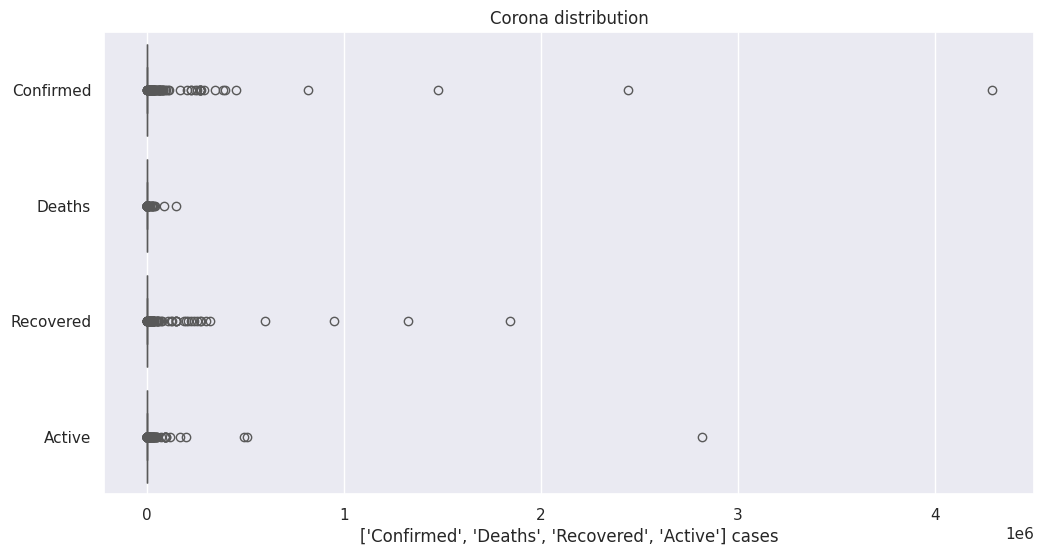

In [ ]:
sns.set(style="darkgrid")
allcases = ['Confirmed', 'Deaths', 'Recovered', 'Active']
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_covcountry[allcases], orient='h', palette='Set2', color = 'r')
plt.xlabel(f'{allcases} cases')
plt.title('Corona distribution')
plt.show()

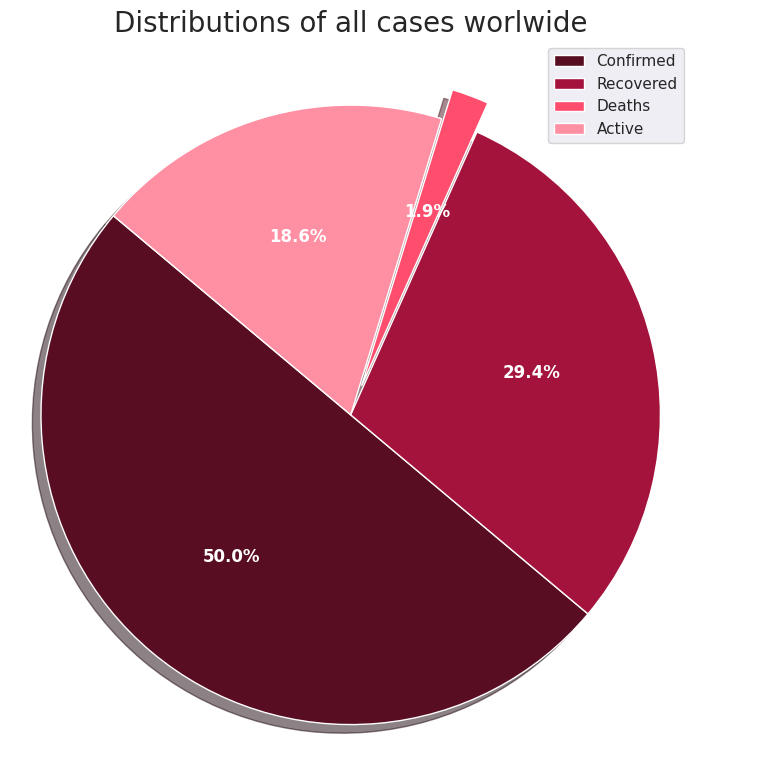

In [ ]:
df_intotalcases = merged_covcountry[['Confirmed','Recovered', 'Deaths', 'Active']].sum()
label = ['Confirmed','Recovered', 'Deaths', 'Active']
color_scale = ['#590d22','#a4133c','#ff4d6d','#ff8fa3']
plt.figure(figsize = (8,8))
plt.pie(df_intotalcases, labels = label, autopct = '%1.1f%%', explode = (0,0,0.1,0) ,colors = color_scale, startangle = 140, shadow = True, textprops={'color': 'white','weight': 'bold'})
plt.title("Distributions of all cases worlwide", fontsize = 20)
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

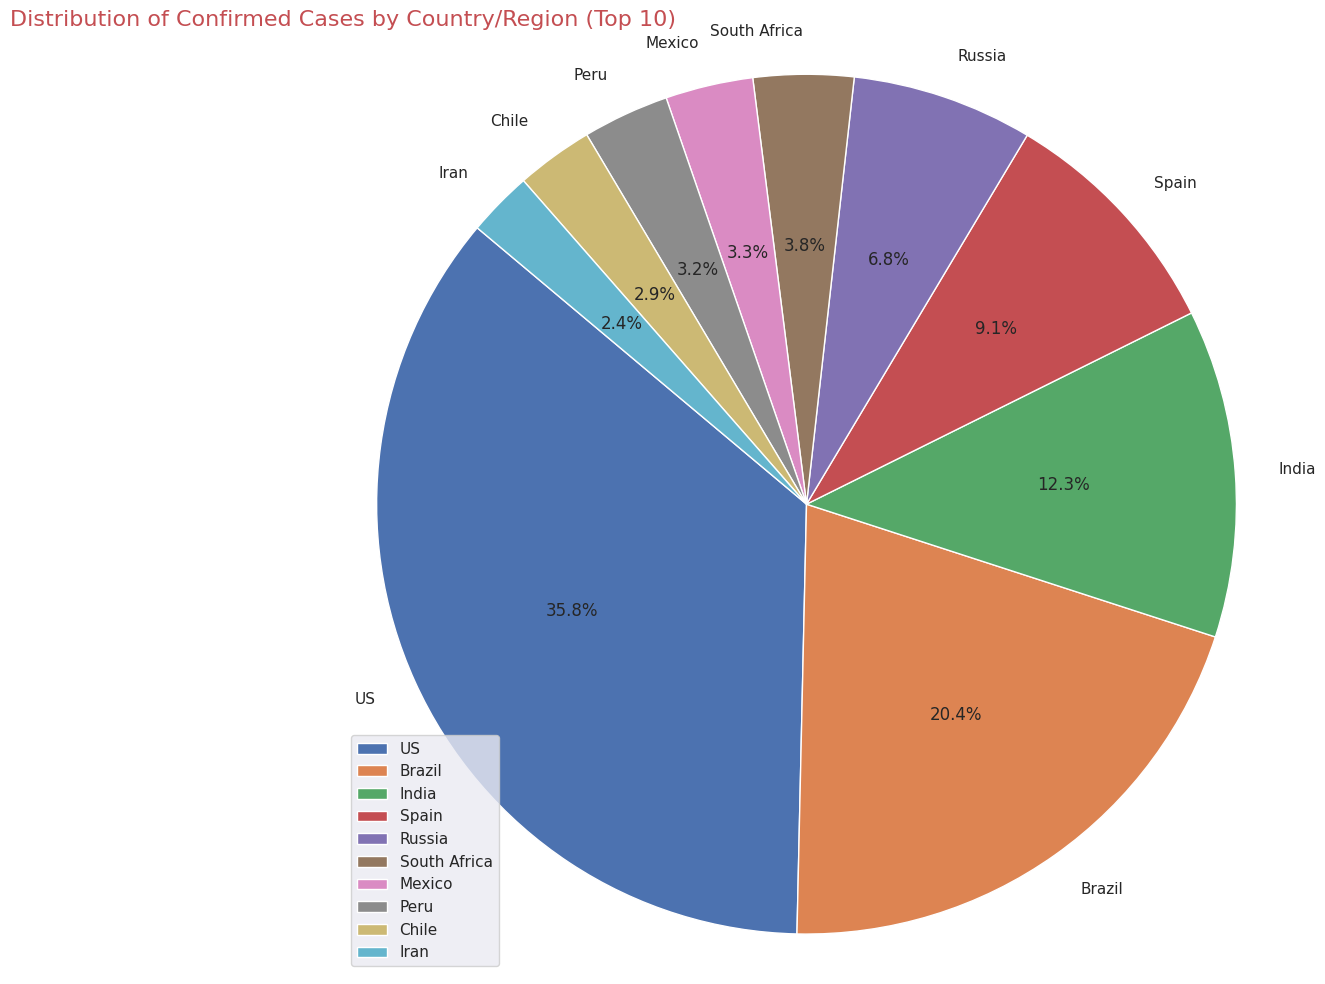

In [ ]:
country_totals = merged_covcountry.groupby('Country/Region')['Confirmed'].sum().nlargest(10)
plt.figure(figsize=(10,10))
plt.pie(country_totals, labels=country_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Confirmed Cases by Country/Region (Top 10)', fontsize = 16, color='r', loc='left', horizontalalignment='center')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df_target_recover = df_fgroup.groupby('Country/Region')['Recovered'].sum().reset_index()
df_target_recover.sort_values(by = 'Recovered', ascending = False).head()

,Country/Region,Recovered
173,US,56353416
23,Brazil,54492873
138,Russia,25120448
79,India,23783720
65,Germany,17107839


In [ ]:
df_fgroup.groupby(['Country/Region', 'Date'])['Recovered'].transform('sum')

0           0
1           0
2           0
3           0
4           0
         ... 
35151    3752
35152       8
35153     833
35154    2815
35155     542
Name: Recovered, Length: 35156, dtype: int64

In [ ]:
us_cases = df_fgroup[df_fgroup['Country/Region'] == 'US'].groupby('Country/Region')[['Confirmed', 'Recovered', 'Deaths', 'Active']].sum().reset_index()
us_cases

,Country/Region,Confirmed,Recovered,Deaths,Active
0,US,224345948,56353416,11011411,156981121


Text(0, 0.5, 'Number of Cases')

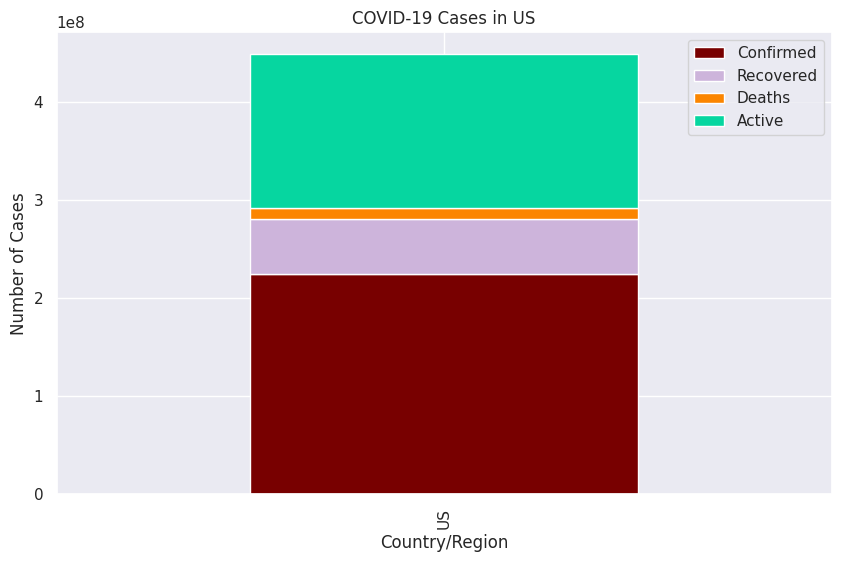

In [ ]:
us_cases.set_index('Country/Region', inplace=True)
pp = ['#780000', '#cdb4db','#fb8500', '#06d6a0']
ax = us_cases[['Confirmed','Recovered', 'Deaths', 'Active']].plot(kind='bar', stacked=True, figsize=(10, 6),color = pp )
plt.title('COVID-19 Cases in US')
plt.xlabel('Country/Region')
plt.ylabel('Number of Cases')

In [ ]:
confirmed_cases = pd.DataFrame(merged_covcountry.groupby('Country/Region')['Confirmed'].sum())


confirmed_cases['Country/Region'] = confirmed_cases.index
df_confirmedcases = confirmed_cases[['Country/Region','Confirmed']]
color_scale = px.colors.sequential.Reds


fig = px.bar(df_confirmedcases.sort_values('Confirmed',ascending=False)[:20][::-1], #sorting by confirmed column and taking 20 but desc
             x='Confirmed',
             y='Country/Region',
             title='Confirmed Cases Worldwide',
             color_continuous_scale=color_scale,
             color = 'Confirmed',
             text='Confirmed',              height=900,
             orientation='h')
fig.show()

In [ ]:
case_index = df_fgroup.groupby('Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
case_index.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [ ]:
fig = make_subplots(rows=1, cols=4, subplot_titles=("Comfirmed", "Deaths", "Recovered",'Active'))


case1 = go.Scatter(
                x=case_index['Date'],
                y=case_index['Confirmed'],
                name="Confirmed",
                line_color='#590d22',
                mode='lines+markers',
                opacity=0.8)
case2 = go.Scatter(
                x=case_index['Date'],
                y=case_index['Deaths'],
                name="Deaths",
                line_color='#c9184a',
                mode='lines+markers',
                opacity=0.8)

case3 = go.Scatter(
                x=case_index['Date'],
                y=case_index['Recovered'],
                name="Recovered",
                mode='lines+markers', #these are the lines and marking point
                line_color='#ff758f',
                opacity=0.8)

case4 = go.Scatter(
                x=case_index['Date'],
                y=case_index['Active'],
                name="Active",
                line_color='#fff0f3',
                mode='lines+markers',
                opacity=0.8)


fig.add_trace(case1, 1,1)
fig.add_trace(case2, 1,2)
fig.add_trace(case3, 1,3)
fig.add_trace(case4, 1,4)
fig.update_layout(
    title_text='<b>Analysis of Corona spread over time globally</b>',
    font=dict(size=14, color='white')
)
fig.show()
